# Coursera ML - Week 7

https://www.coursera.org/learn/machine-learning/home/week/7

## Support Vector Machines

### Alternative view of logistic regression

$$h_\theta(x) = \frac{1}{1+e^{-\theta^T x}}$$

$z = \theta^T x$

For $y=1$, we want $h\approx 1$, i.e. $z\gg0$, and vice versa

Cost of one example is
$$-y \log h -(1-y) log(1-h)$$

### SVM cost function

Use piecewise-linear approximations to $-\log(h)$ and $-\log(1-h)$: $\mathrm{cost}_1(z)$ and $\mathrm{cost}_0(z)$

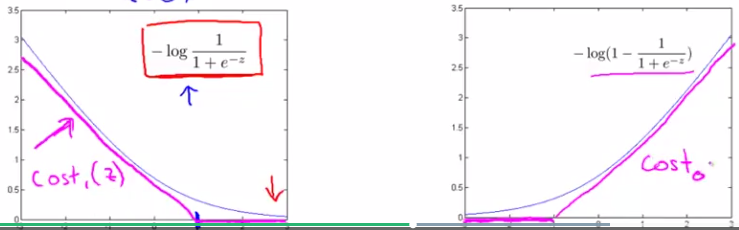

Linear approximations go to 0 at +1 (and -1, resp.)

Our cost function optimization becomes:
$$\displaystyle\mathop{\mbox{min}}_\theta\ \frac{1}{m}\left[\sum_{i=1}^{m}y^{(i)}\text{cost}_1(\theta^Tx^{(i)}) + (1-y^{(i)}) \text{cost}_0(\theta^Tx^{(i)})\right]+\frac{\lambda}{2m}\sum_{j=1}^n\theta^2_j$$

conventionally writte as
$$
\displaystyle\mathop{\mbox{min}}_\theta\ C\left[\sum_{i=1}^{m}y^{(i)}\text{cost}_1(\theta^Tx^{(i)}) + (1-y^{(i)}) \text{cost}_0(\theta^Tx^{(i)})\right]+\frac{1}{2}\sum_{j=1}^n\theta^2_j
$$

### SVM hypothesis

SVM does **not** output **probability**

Hypothesis:

$$h(\theta) =
\begin{cases}
1 \quad \textrm{if}\quad \theta^T x\geq 0 \\
0 \quad \textrm{if}\quad \theta^T x < 0
\end{cases}
$$

### Large Margin Intuition

![image.png](attachment:image.png)

For large $C$, reguralization term is negligible

If $y=1$, we want $\theta^T x \geq 1$ (not just $\geq0$)

If $y=0$, we want $\theta^T x \leq -1$ (not just $\leq0$)

#### Linearly separable case
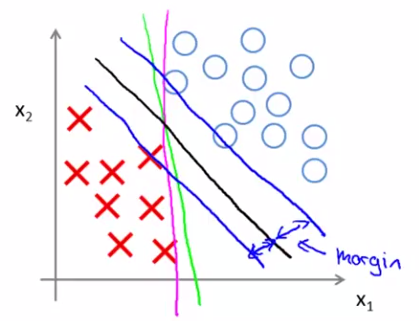

$C$ very large: decision boundary susceptible to outliers

## Kernels
### Non-linear decision boundary
#### Polynomial features
E.g. $f_1 = x_1$, $f_2 = x_2$, $f_3 = x_1 x_2$, $f_4 = x_1^2$, etc.

#### Kernel
Given $x$, compute new feature depending on proximity to landmarks $l^{(1)}, l^{(2)}, l^{(3)}$

$$f_i = \textrm{similarity}(x, l^{(i)}) = \exp\left(-\frac{\left|x-l^{(i)}\right|^2}{2\sigma^2} \right)$$

Kernel = Similarity function

E.g. Gaussian kernal, $k(x, l^{(i)})$

Parameter $\sigma^2$

Non-linear model based on proximity to **landmarks** (and values as landmarks)

### Choosing the landmarks

Choose a landmark for each training example: $l^{(i)} = x^{(i)}$

Compute similarities $f_i$ ($f_0 = 1$)

### Use SVM with $f_i$

Amended reguralization term: $\theta^T M \theta$ (instead of $\theta^T\theta$)

SVM+kernels benefit from specific numerical optimizations (less efficient for e.g. logistic regression+kernels)

### SVM parameters

$C = \frac{1}{\lambda}$

Large $C$: lower bias, higher variance (small $\lambda$)

Small $C$: higher bias, lower variance (large $\lambda$)

$\sigma^2$

Large $\sigma^2$: features $f_i$ vary more smoothly. Higher bias, lower variance.

Small $\sigma^2$: features $f_i$ vary less smoothly. Lower bias, higher variance.


## Using an SVM
### Choise of parameters and kernel
use SVM package (`liblinear`, `libsvm`)

Choose:
* parameter $C$
* kernel (similarity function)
    - no kernel ("linear kernel"): $y=1$ if $\theta^T x\geq 0$. *Use for $n$ (# features) large, $m$ (# examples) small*
    - Gaussian kernel: need to choose $\sigma^2$ *Use when $n$ small, $m$ large*
    
**NB** perform feature scaling before using Gaussian kernel

**NB** kernel function $K(x, x)$ must satisfy "Mercer's Theorem"

Off-the-shelf kernels:
* Gaussian
* Polynomial (uncommon, used for non-neg $x$, $l$): $(x^T l)^2$, $(x^T l+c)^d$
* More isoteric: string kernal, chi-square, histogram, intersection
  - e.g. similarity between two strings
  
### Multi-class classification
Built-in or use "one-vs-all"

$n$ features ($x \in \mathbb{R}^{n+1}$), $m$ examples

* $n$ large, $m$ intermediate (e.g. $n \geq m$, $n=10000$, $m=10-1000$): logistic regression, or SVM w/o kernel

* $n$ small, $m$ intermediate (e.g. $n = 1-1000$, $m=10-1000$): SVM with Gaussian kernel

* $n$ small, $m$ large (e.g. $n = 1-1000$, $m\geq 50000+$): create/add more features, then use logistic regression or SVM w/o kernel

#### Neural network likely to work well for most of these settings, but may be slower to train